In [ ]:
import numpy as np 
import sklearn.preprocessing as pre

import matplotlib.pyplot as plt

data_object = np.load("../DATA/MomentumOrdered100-000Events20ParticlesFlattened.npz")
data = data_object["data"]

scaled_data_object = np.load("../processedData/20EventData/100-000Events20ParticlesNormalScaled.npz")
scaled_data = scaled_data_object["data"]
print(data.shape)


baler_data_object = np.load("../../workspaces/ATLAS/data/100-000Events20ParticlesNormalScaled.npz")

(100000, 80)


In [2]:
def log_minmax(arr):
    eps = 10e-12
    arr_clipped = np.clip(arr, 0.1,  None) 
    log_arr = np.log10(arr_clipped)
    log_min = np.log10(arr_clipped.min())
    log_max = np.log10(arr_clipped.max())
    return (
        (log_arr - log_min) / (log_max - log_min) if log_max != log_min else 0,
        (log_min.astype(np.float32), log_max.astype(np.float32))
    )

def inverse_log_minmax(norm_arr, *log):
    norm_arr = np.array(norm_arr)
    log_arr = norm_arr * (log[1] - log[0]) + log[0]
    return np.power(10, log_arr, dtype=np.float64)

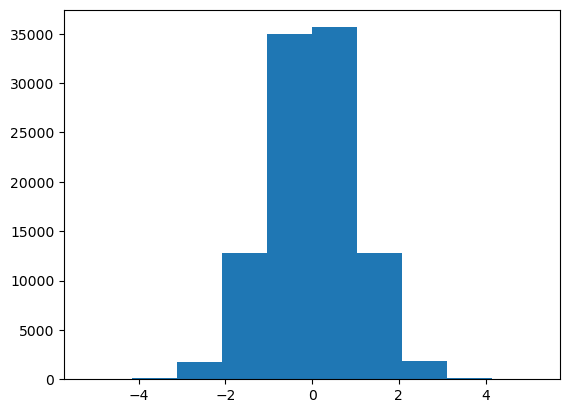

In [7]:
normed, (log_min_val, log_max_val) = log_minmax(data[:, 3])

# Now pass correctly to inverse_log_minmax
reconstructed = inverse_log_minmax(normed, log_min_val, log_max_val)

# Plot histogram of reconstruction error
#plt.hist(data[:, 3], bins=200)
plt.hist(scaled_data[: ,3 ])
print("")

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 8.000e+00,
        9.000e+00, 1.100e+01, 8.000e+00, 1.600e+01, 1.700e+01, 2.300e+01,
        2.300e+01, 2.300e+01, 4.100e+01, 5.200e+01, 5.600e+01, 7.900e+01,
        8.500e+01, 9.600e+01, 1.370e+02, 1.570e+02, 1.810e+02, 2.340e+02,
        2.490e+02, 2.910e+02, 3.290e+02, 4.060e+02, 5.100e+02, 5.750e+02,
        7.020e+02, 8.470e+02, 9.640e+02, 1.095e+03, 1.333e+03, 1.499e+03,
        1.791e+03, 2.224e+03, 2.702e+03, 3.188e+03, 3.396e+03, 3.574e+03,
        3.540e+03, 3.444e+03, 3.390e+03, 3.103e+03, 2.978e+03, 2.857e+03,
        2.708e+03, 2.529e+03, 2.523e+03, 2.406e+03, 2.200e+03, 2.233e+03,
        2.164e+03, 2.162e+03, 2.099e+03, 2.050e+03, 1.983e+03, 1.829e+03,
        1.857e+03, 1.783e+03, 1.711e+03, 1.705e+03, 1.685e+03, 1.600e+03,
        1.394e+03, 1.428e+03, 1.338e+03, 1.275e+03, 1.189e+03, 1.145e+03,
        1.026e+03, 1.023e+03, 9.470e+0

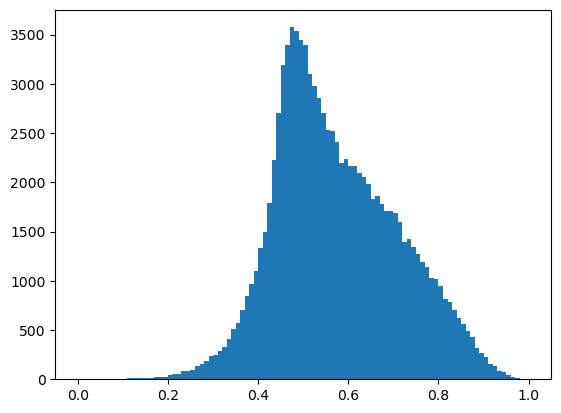

In [56]:
plt.hist(normed, bins = 100)

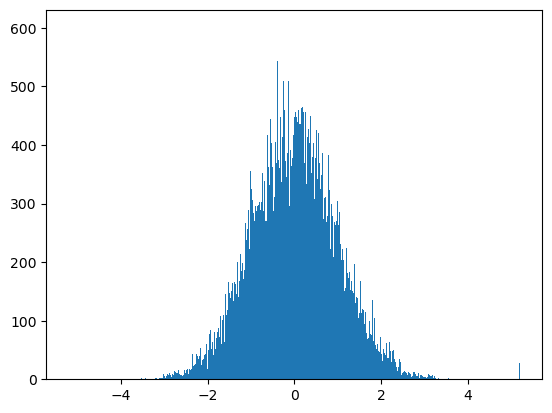

In [57]:
trans = pre.QuantileTransformer(output_distribution="normal")
quant = trans.fit_transform(data[:, 3].reshape(-1, 1))
plt.hist(quant, bins = 1000)
print("")

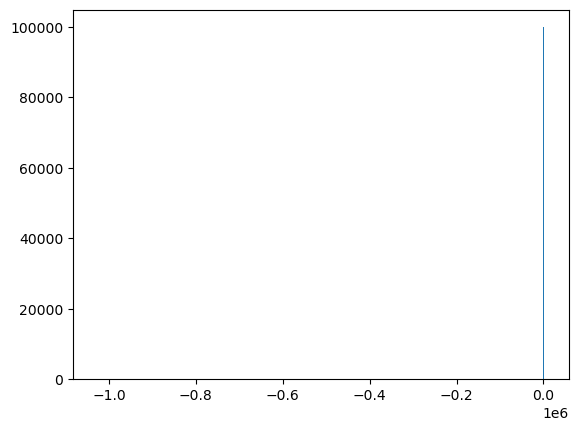

In [58]:
plt.hist(trans.inverse_transform(quant).reshape(-1) - data[: ,3 ], bins = 1000)
print("")

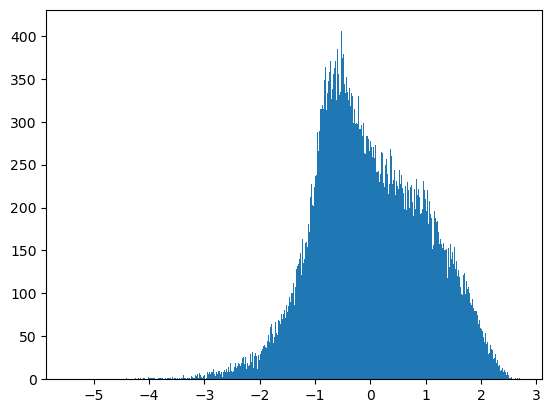

In [59]:

power_trans = pre.PowerTransformer()
power = power_trans.fit_transform(data[: , 3].reshape(-1 ,1 ))

plt.hist(power, bins = 1000)
print("")

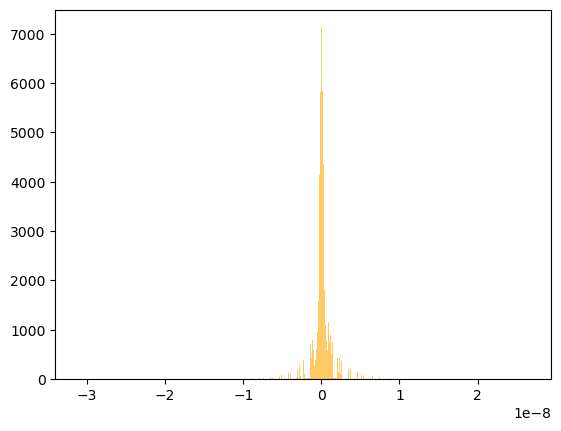

In [60]:
#plt.hist(data[: , 3], bins=1000, alpha=0.6, label="Original Power", color='blue')
plt.hist(power_trans.inverse_transform(power).reshape(-1)- data[:, 3], bins=1000, alpha=0.6, label="Inverse Transformed Power", color='orange')

print("")